# <span style="color: #2E86C1;">Autism Spectrum Disorder Analysis</span>

Autism Spectrum Disorder (**ASD**), also known as autism, is a neurodevelopmental condition characterized by challenges in social interaction, communication, and repetitive behaviors. Individuals with autism may exhibit a wide range of abilities and symptoms, forming a spectrum. Understanding and accurately classifying autism can be a complex task due to the diversity within the spectrum.

**Machine Learning (ML)** plays a vital role in addressing this challenge by leveraging algorithms to analyze patterns and make predictions based on data.

## <span style="color: #E74C3C;">Data Description</span>

The dataset consists of the following columns:

- **<span style="color: #3498DB;">ID</span>**: The unique identifier for each patient.
- **<span style="color: #3498DB;">A1_Score to A10_Score</span>**: Scores from the Autism Spectrum Quotient (AQ) 10-item screening tool.
- **<span style="color: #3498DB;">Age</span>**: The age of the patient in years.
- **<span style="color: #3498DB;">Gender</span>**: The gender of the patient.
- **<span style="color: #3498DB;">Ethnicity</span>**: The ethnicity of the patient.
- **<span style="color: #3498DB;">Jaundice</span>**: Indicates whether the patient had jaundice at the time of birth (Yes/No).
- **<span style="color: #3498DB;">Autism</span>**: Indicates whether an immediate family member has been diagnosed with autism (Yes/No).
- **<span style="color: #3498DB;">Country_of_res</span>**: The country of residence of the patient.
- **<span style="color: #3498DB;">Used_app_before</span>**: Indicates whether the patient has previously undergone a screening test (Yes/No).
- **<span style="color: #3498DB;">Result</span>**: The result score of the AQ1-10 screening test.
- **<span style="color: #3498DB;">Age_desc</span>**: Descriptive representation of the patient's age (e.g., "20 years").
- **<span style="color: #3498DB;">Relation</span>**: The relation of the person who completed the test (e.g., "self," "parent," etc.).
- **<span style="color: #3498DB;">Class/ASD</span>**: The classification result, represented as 0 (No) or 1 (Yes), which serves as the target column for predictions.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv("./train.csv")
df

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,1,1,1,1,1,1,1,1,1,...,f,White-European,no,yes,United States,no,13.390868,18 and more,Self,1
796,797,1,1,0,0,1,0,0,0,1,...,f,Asian,no,no,New Zealand,no,9.454201,18 and more,Self,0
797,798,0,0,0,0,0,0,1,0,1,...,m,White-European,yes,no,Jordan,no,6.805509,18 and more,Self,1
798,799,1,1,1,1,1,1,0,1,1,...,f,Middle Eastern,no,yes,United States,no,3.682732,18 and more,Relative,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.582500,0.493455,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.286250,0.452290,0.000000,0.000000,0.000000,1.000000,1.000000
A3_Score,800.0,0.321250,0.467249,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.457500,0.498502,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.208750,0.406670,0.000000,0.000000,0.000000,0.000000,1.000000
A7_Score,800.0,0.273750,0.446161,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.717500,0.450497,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.316250,0.465303,0.000000,0.000000,0.000000,1.000000,1.000000


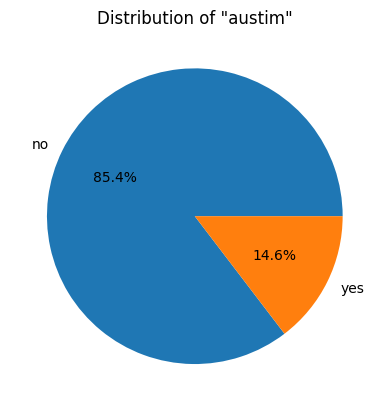

In [16]:
data = df['austim']
value_counts = data.value_counts()

labels = value_counts.index
values = value_counts.values

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of "austim"')
plt.show()


In [26]:
df["ethnicity"].value_counts()

ethnicity
White-European     211
?                  151
Asian              134
Middle Eastern     116
Black               45
Latino              44
South Asian         35
Others              24
Pasifika            18
Hispanic            16
Turkish              4
others               2
Name: count, dtype: int64

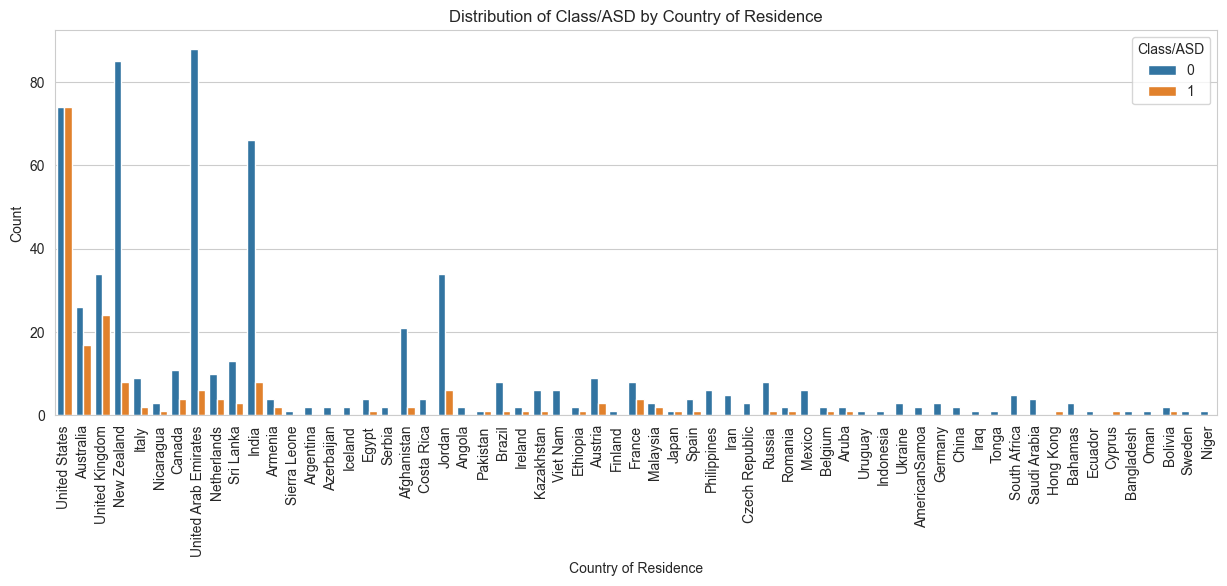

In [25]:
import matplotlib.pyplot as plt
import seaborn as sb


plt.figure(figsize=(15, 5))
sb.set_style("whitegrid")

sb.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.title('Distribution of Class/ASD by Country of Residence')
plt.xlabel('Country of Residence')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [72]:
df1 = df.drop(["ID","relation","age_desc"],axis=1)
df1['gender'].replace({'f':0,'m':1}, inplace=True)
df1['jaundice'].replace({'no':0,'yes':1}, inplace=True)
df1['austim'].replace({'no':0,'yes':1}, inplace=True)
df1['used_app_before'].replace({'no':0,'yes':1}, inplace=True)
df1['age'] = df1['age'].round().astype(int)
df1['result'] = df1['result'].round().astype(int)
df1

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,19,0,White-European,0,0,United States,0,8,0
1,0,0,0,0,0,0,0,0,0,1,14,0,South Asian,0,0,Australia,0,11,0
2,1,1,1,1,1,1,0,0,1,1,15,0,White-European,0,0,United Kingdom,0,13,1
3,0,0,0,1,0,0,0,0,0,0,61,0,South Asian,0,0,New Zealand,0,2,0
4,0,0,0,0,1,0,0,0,1,1,14,1,Black,0,1,Italy,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1,1,1,1,1,1,1,1,1,1,42,0,White-European,0,1,United States,0,13,1
796,1,1,0,0,1,0,0,0,1,1,18,0,Asian,0,0,New Zealand,0,9,0
797,0,0,0,0,0,0,1,0,1,1,18,1,White-European,1,0,Jordan,0,7,1
798,1,1,1,1,1,1,0,1,1,1,19,0,Middle Eastern,0,1,United States,0,4,0


In [78]:
encoder = LabelEncoder()
df1["ethnicity"] = encoder.fit_transform(df1["ethnicity"])
df1["contry_of_res"] = encoder.fit_transform(df1["contry_of_res"])
df1

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,19,0,10,0,0,58,0,8,0
1,0,0,0,0,0,0,0,0,0,1,14,0,8,0,0,6,0,11,0
2,1,1,1,1,1,1,0,0,1,1,15,0,10,0,0,57,0,13,1
3,0,0,0,1,0,0,0,0,0,0,61,0,8,0,0,39,0,2,0
4,0,0,0,0,1,0,0,0,1,1,14,1,2,0,1,32,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1,1,1,1,1,1,1,1,1,1,42,0,10,0,1,58,0,13,1
796,1,1,0,0,1,0,0,0,1,1,18,0,1,0,0,39,0,9,0
797,0,0,0,0,0,0,1,0,1,1,18,1,10,1,0,34,0,7,1
798,1,1,1,1,1,1,0,1,1,1,19,0,5,0,1,58,0,4,0


In [79]:
x = df1.drop("Class/ASD",axis=1)
y = df1["Class/ASD"]

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
import numpy as np

# Assuming x and y are your features and labels

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr_scores = cross_val_score(lr, x, y,cv=3)

# Random Forest
rf = RandomForestClassifier()
rf_scores = cross_val_score(rf, x, y,cv=3)

# Support Vector Classifier
svc = SVC()
svc_scores = cross_val_score(svc, x, y,cv=3)

# Naive Bayes
Naive_Bayes = GaussianNB()
Naive_Bayes_scores = cross_val_score(Naive_Bayes, x, y,cv=3)


# Calculate averages
lr_avg = np.mean(lr_scores)
rf_avg = np.mean(rf_scores)
svc_avg = np.mean(svc_scores)
Naive_Bayes_avg = np.mean(Naive_Bayes_scores)

# Find the best model
best_model = max([("Logistic Regression", lr_avg), ("Random Forest", rf_avg), ("Support Vector Classifier", svc_avg),("Naive Bayes Classifier:", Naive_Bayes_avg)], key=lambda x: x[1])

# Print results
print("Average scores:")
print("Logistic Regression:", lr_avg)
print("Random Forest:", rf_avg)
print("Support Vector Classifier:", svc_avg)
print("Naive Bayes Classifier:", Naive_Bayes_avg)

print("\nThe best model is:", best_model[0], "with an average score of:", best_model[1])


Average scores:
Logistic Regression: 0.8787652652229826
Random Forest: 0.8724996010625815
Support Vector Classifier: 0.7837618390545652
Naive Bayes Classifier: 0.8537964762092498

The best model is: Logistic Regression with an average score of: 0.8787652652229826


In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [88]:
model = LogisticRegression()

model.fit(x_train, y_train)
model.score(x_test,y_test)

0.86875

Now Using Tenserflow model

In [97]:
# Tenserflow model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score

model = Sequential()

model.add(Dense(units=6, input_dim=x_train.shape[1], activation='relu'))

model.add(Dense(units=6, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1000)


Epoch 1/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - accuracy: 0.2258 - loss: 9.0049 
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.2276 - loss: 6.5749
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.2107 - loss: 4.6237
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.2226 - loss: 3.2085
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.2444 - loss: 2.1691
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.2701 - loss: 1.5096
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.3643 - loss: 0.9560
Epoch 8/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.4318 - loss: 0.8130
Epoch 9/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.5023 - loss: 0.7495
Epoch 10/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.5858 - loss: 0.6877
Epoch 11/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.6316 - loss: 0.6734
Epoch 12/1000
20/20 ━━━━━━━━━

[0.6653064489364624, 0.84375]

Test Data

In [163]:
df1_test

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result
0,0,0,0,0,0,0,0,1,0,0,13,1,1,0,0,40,0,-1
1,1,0,0,0,1,0,0,0,0,0,25,0,0,1,0,29,0,5
2,1,0,0,1,0,1,0,1,0,0,29,0,1,0,0,6,0,-2
3,1,1,1,0,1,0,1,0,1,1,17,0,5,1,0,8,0,12
4,1,0,0,1,1,0,0,1,1,0,54,0,10,0,0,5,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,0,0,0,0,0,1,0,0,0,22,0,8,0,0,29,0,6
196,1,1,1,0,1,0,0,0,1,1,14,0,10,0,1,10,0,9
197,1,0,1,1,1,0,0,1,1,0,38,0,8,1,0,29,0,9
198,1,1,1,1,1,1,1,1,1,1,39,0,10,1,0,41,0,12


In [165]:
df_test = pd.read_csv("./test.csv")

encoder = LabelEncoder()
df1_test = df_test.drop(["ID","relation","age_desc"],axis=1)
df1_test['gender'].replace({'f':0,'m':1}, inplace=True)
df1_test['jaundice'].replace({'no':0,'yes':1}, inplace=True)
df1_test['austim'].replace({'no':0,'yes':1}, inplace=True)
df1_test['used_app_before'].replace({'no':0,'yes':1}, inplace=True)
df1_test['age'] = df_test['age'].round().astype(int)
df1_test['result'] = df_test['result'].round().astype(int)
df1_test["ethnicity"] = encoder.fit_transform(df_test["ethnicity"])
df1_test["contry_of_res"] = encoder.fit_transform(df_test["contry_of_res"])
df1_test

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result
0,0,0,0,0,0,0,0,1,0,0,13,1,1,0,0,40,0,-1
1,1,0,0,0,1,0,0,0,0,0,25,0,0,1,0,29,0,5
2,1,0,0,1,0,1,0,1,0,0,29,0,1,0,0,6,0,-2
3,1,1,1,0,1,0,1,0,1,1,17,0,5,1,0,8,0,12
4,1,0,0,1,1,0,0,1,1,0,54,0,10,0,0,5,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,0,0,0,0,0,1,0,0,0,22,0,8,0,0,29,0,6
196,1,1,1,0,1,0,0,0,1,1,14,0,10,0,1,10,0,9
197,1,0,1,1,1,0,0,1,1,0,38,0,8,1,0,29,0,9
198,1,1,1,1,1,1,1,1,1,1,39,0,10,1,0,41,0,12


In [166]:
x_test_data = df1_test.drop("Class/ASD",axis=1)
y_test_data = df1_test["Class/ASD"]

KeyError: "['Class/ASD'] not found in axis"

In [104]:
model = LogisticRegression()

model.fit(x, y)
model.score(x_test_data,y_test_data)

0.875

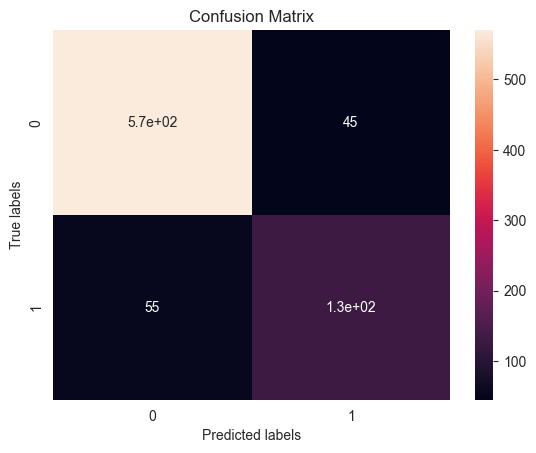

In [105]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(x_test_data)
cm = confusion_matrix(y_test_data, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted labels')

plt.ylabel('True labels')

plt.title('Confusion Matrix')

plt.show()

Tenserflow

In [108]:
# Tenserflow model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score

model = Sequential()

model.add(Dense(units=6, input_dim=x_train.shape[1], activation='relu'))

model.add(Dense(units=6, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Epoch 1/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 0.7677 - loss: 1.2014 
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.7523 - loss: 0.7248
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.6985 - loss: 0.6214
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.7028 - loss: 0.5377
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.7222 - loss: 0.5201
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.7506 - loss: 0.5144
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.7989 - loss: 0.4726
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.8108 - loss: 0.4814
Epoch 9/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.8115 - loss: 0.4648
Epoch 10/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.8437 - loss: 0.4263
Epoch 11/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.8183 - loss: 0.4288
Epoch 12/1000
25/25 ━━━━━━━━━

[0.24133895337581635, 0.893750011920929]

In [110]:
model.fit(x, y, epochs=10000)
model.evaluate(x_test_data, y_test_data)

Epoch 1/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.9094 - loss: 0.2157
Epoch 2/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.8873 - loss: 0.2311
Epoch 3/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9014 - loss: 0.2317 
Epoch 4/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8842 - loss: 0.2618 
Epoch 5/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.9123 - loss: 0.2214
Epoch 6/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.9151 - loss: 0.2225
Epoch 7/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.8930 - loss: 0.2496
Epoch 8/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.9027 - loss: 0.2253
Epoch 9/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.8923 - loss: 0.2291
Epoch 10/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.8963 - loss: 0.2394
Epoch 11/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.8865 - loss: 0.2455
Epoch 12/10000
25/25 

[0.1693161576986313, 0.9287499785423279]

Find the Best Features 

In [112]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from deap import base, creator, tools, algorithms

# Load your data (placeholder code; replace with actual data loading code)
# x, y = load_your_data_here()

# Split data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=40)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Define the evaluation function for the genetic algorithm
def evaluate(ind):
    units_1, units_2, epochs, batch_size = ind

    # Create the model
    model = Sequential()
    model.add(Dense(units=int(units_1), input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(units=int(units_2), activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model with given hyperparameters
    model.fit(x_train, y_train, epochs=int(epochs), batch_size=int(batch_size), verbose=0)

    # Evaluate the model on validation data
    loss, accuracy = model.evaluate(x_val, y_val, verbose=0)
    
    # Return accuracy as fitness value
    return accuracy,

# Define genetic algorithm parameters
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int", np.random.randint, 5, 50)  # Units range from 5 to 50
toolbox.register("attr_epochs", np.random.randint, 10, 100)  # Epochs range from 10 to 100
toolbox.register("attr_batch_size", np.random.choice, [8, 16, 32, 64])  # Batch size options

# Register individual and population creation functions
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_int, toolbox.attr_int, toolbox.attr_epochs, toolbox.attr_batch_size),
                 n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register genetic algorithm operators
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=5, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Create initial population
population = toolbox.population(n=10)

# Run the genetic algorithm
algorithm_result = algorithms.eaMuPlusLambda(population, toolbox, mu=10, lambda_=50, cxpb=0.7, mutpb=0.2, ngen=10, stats=None, halloffame=None)

# Extract the best individual (optimal hyperparameters) from the evolved population
best_individual = tools.selBest(population, 1)[0]

# Print the best individual (optimal hyperparameters)
print("Best Individual (hyperparameters):", best_individual)

# Get the best hyperparameters from the best individual
best_units_1, best_units_2, best_epochs, best_batch_size = map(abs, best_individual)

# Create the TensorFlow model with the best hyperparameters
model = Sequential()
model.add(Dense(units=int(best_units_1), input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(units=int(best_units_2), activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model with the best hyperparameters
model.fit(x_train, y_train, epochs=int(best_epochs), batch_size=int(best_batch_size), verbose=1)

# Evaluate the model's performance on the validation data
loss, accuracy = model.evaluate(x_val, y_val)

# Print the model's accuracy
print("Model accuracy on validation data: {:.2f}%".format(accuracy * 100))
print(best_individual)
print(best_batch_size)


gen	nevals
0  	10    
1  	44    
2  	44    
3  	40    
4  	48    
5  	43    
6  	44    
7  	48    
8  	45    
9  	46    
10 	42    
Best Individual (hyperparameters): [41, 37, 87, 64]
Epoch 1/87
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2719 - loss: 5.6760  
Epoch 2/87
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4466 - loss: 1.2880 
Epoch 3/87
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.7859 - loss: 1.0369
Epoch 4/87
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7851 - loss: 0.8024 
Epoch 5/87
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.7284 - loss: 0.5887
Epoch 6/87
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.7294 - loss: 0.5463
Epoch 7/87
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7726 - loss: 0.5269 
Epoch 8/87
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7762 - loss: 0.4654 
Epoch 9/87
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7789 - loss: 0.4753 
Epoch 10/87
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.

In [121]:
print(best_individual)
print(best_batch_size)

[41, 37, 87, 64]
64


In [127]:
# Tenserflow model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score

model = Sequential()

model.add(Dense(units=41, input_dim=x_train.shape[1], activation='relu'))

model.add(Dense(units=37, activation='relu'))

model.add(Dense(units=87, activation='sigmoid'))
model.add(Dense(units=64, activation='sigmoid'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x, y, epochs=1000)
# Evaluate using only test  data
model.evaluate(x_test_data, y_test_data)

Epoch 1/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.7387 - loss: 0.5789 
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.7541 - loss: 0.5300
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.7666 - loss: 0.4877
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.7757 - loss: 0.4445
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.7900 - loss: 0.4309
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.8341 - loss: 0.3828
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.8662 - loss: 0.3432
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.8491 - loss: 0.3878
Epoch 9/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.8949 - loss: 0.3217
Epoch 10/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.8652 - loss: 0.3317
Epoch 11/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8704 - loss: 0.3345 
Epoch 12/1000
25/25 ━━━━━━━━━━

[0.00045479409163817763, 1.0]

### 100% Accuracy Got  in train and test data




25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
AUC: 1.00


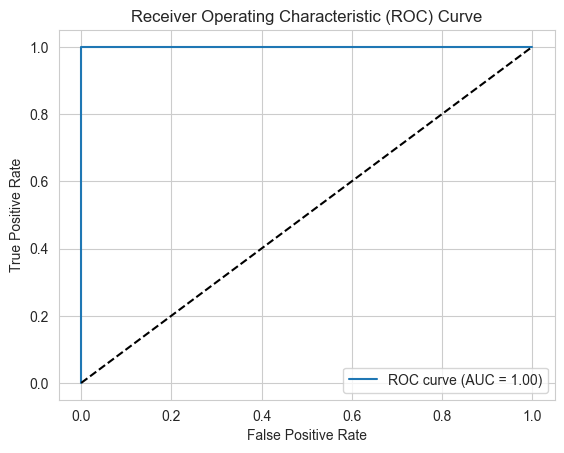

In [129]:
from sklearn.metrics import roc_curve, roc_auc_score
y_prob = model.predict(x_test_data).ravel()  # Use ravel() to convert probabilities to a 1D array

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_data, y_prob)

# Calculate AUC
auc = roc_auc_score(y_test_data, y_prob)
print(f'AUC: {auc:.2f}')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


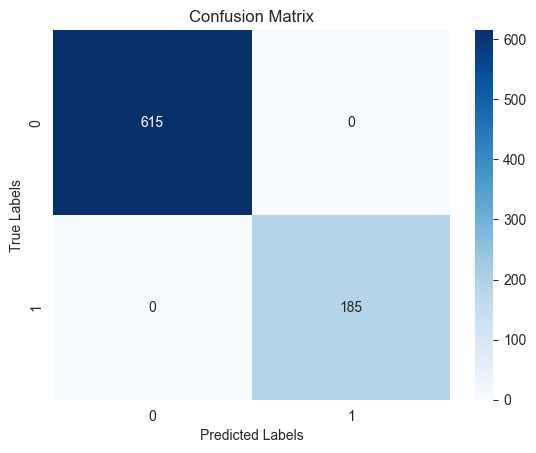

In [152]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


y_predict = model.predict(x_test_data)
y_predict_binary = (y_predict >= 0.5).astype(int)

cm = confusion_matrix(y_test_data, y_predict_binary)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Submission

In [170]:
y_predict = model.predict(df1_test)
y_predict_binary = (y_predict >= 0.5).astype(int)
y_predict_binary = y_predict_binary.flatten()
y_predict_binary



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0])

In [171]:
len(y_predict_binary)

200

In [173]:
output = pd.DataFrame({'ID': df_test['ID'],
                       'Class/ASD': y_predict_binary})
output.to_csv('submission.csv', index=False)

In [160]:
# Save Model

model.save('Autism Prediction.h5')
